# ДЗ 1. Введение в статистику.

In [ ]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков

## Задание 1. Работа с генерацией (50 баллов)

Цель данного простого задания заключается в повторении пройденного материала на первом занятии и знакомстве с методами моделирования случайных величин, доступными в Python.

#### 1. Описательные статистики.

В ноутбуке, приложенном к занятию, был рассмотрим пример с нормальным распределением. Здесь же мы рассмотрим другое важное распределение - экспоненциальное

* **(5 баллов)** Сгенерируйте 3 выборки из экспоненциального распределения с параметром $\lambda = 0.2$ https://en.wikipedia.org/wiki/Exponential_distribution (внимательно посмотрите в документацию https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html, чтобы правильно передать параметры распредения) размера 100, 1000, 10000. Какая выборочная статистика поможет вам понять, что параметр распределения передан правильно и согласуется с теоретической формулой? Посчитатайте её и сравните с теоретическим значением, которое должно получиться по формуле из Википедии.

In [ ]:
expon_rv = stats.expon(loc = 0, scale = 5)
selection_1 = expon_rv.rvs( size=100, random_state=907)
selection_2 = expon_rv.rvs( size = 1000, random_state = 907)
selection_3 = expon_rv.rvs( size = 10000, random_state = 907)
# Среднее должно быть примерно равно параметру scale или 1/лямбда
print(selection_1.mean())
print(selection_2.mean())
print(selection_3.mean())
# Как видно, при увеличении выборки значение выборочного среднего приближается к теоретическому

5.089924550777492
4.970484240178559
5.041723412660453


* **(5 баллов)** Посчитайте выборочные статистики, рассказанные на лекции (среднее, дисперсия, среднеквадратичное отклонение, медиана, квартили), и сравните их с теоретическими аналогами (воспользуйтесь методами класса stats.expon, а не считайте руками) для каждой выборки. Насколько сильным получилось отклонение от теоретического значения? Влияет ли размер выборки на величину отклонения? Если да, то как?

In [ ]:
# Среднее уже посчитали
print(f'Среднеквадратичное отклонение: выборочное {selection_1.std()} и теоретическое {expon_rv.std()}')
print(f'Медиана: выборочная {np.median(selection_1)} и теоретическая {expon_rv.median()}')
print(f'Дисперсия: выборочная {selection_1.var()} и теоретическая {expon_rv.var()}')
print(f'Квантиль 15% для выборки {np.percentile(selection_1, 15)} для распределения {expon_rv.ppf(0.15)}')

Среднеквадратичное отклонение: выборочное 5.146171303958024 и теоретическое 5.0
Медиана: выборочная 3.5294056634768904 и теоретическая 3.4657359027997265
Дисперсия: выборочная 26.483079089681027 и теоретическая 25.0
Квантиль 15% для выборки 0.7134892158082259 для распределения 0.8125946474888746


* **(10 баллов)** Для выборок размера 100 и 10000 постройте гистограммы, подобрав оптимальное с вашей точки зрения количество бинов на гистограмме. Для иллюстративности наложите на гистограмму теоретический график плотности распределения (не забудьте передать как параметр для построения гистограммы `density=True`). Отличается ли количество бинов, которое вам визуально больше понравилось, для разных размеров выборки?

    Нанесите на гистограмму для выборки размера 10000 выборочные среднее и медиану, подпишите их численное значение на графике. Совпали ли они? Если нет, то попробуйте объяснить (интуитивно, не прибегая к формуле) какая величина получилась меньше и почему?

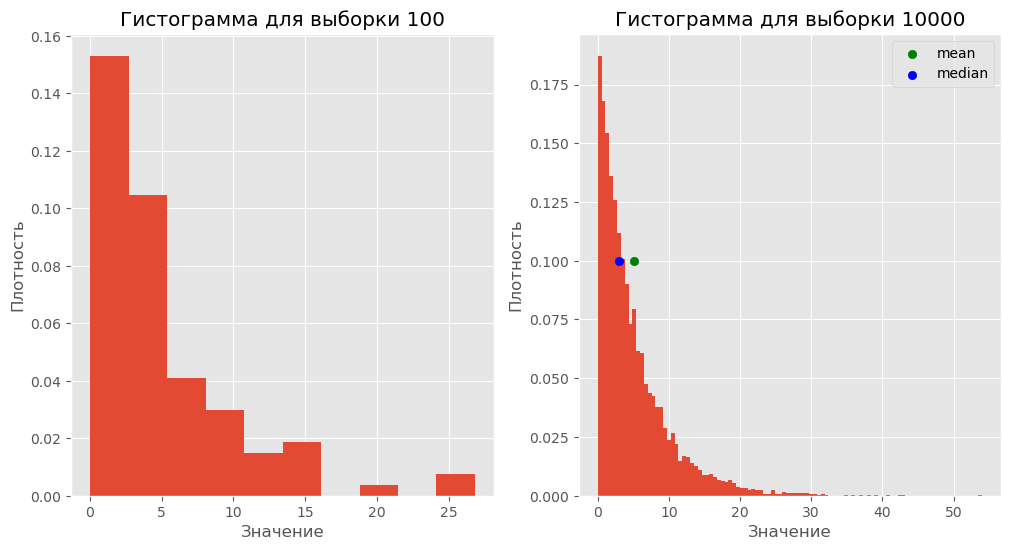

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(selection_1, bins=int(np.sqrt(len(selection_1))), density= True)
plt.title('Гистограмма для выборки 100')
plt.xlabel('Значение')
plt.ylabel('Плотность')

plt.subplot(1, 2, 2)
plt.hist(selection_3, bins=int(np.sqrt(len(selection_3))), density= True)
plt.title('Гистограмма для выборки 10000')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.scatter(selection_3.mean(),0.1, color='green', label= "mean")
plt.scatter(int(np.median(selection_1)), 0.1, color = "blue", label = "median")
plt.legend()
#Медиана и среднее не совпали, медиана оказалась меньше. Это возможно из-за того, что среднее подверженно влиянию выбросов.

* **(5 баллов)** По выборке размера 100 постройте boxplot, поместив под ним гистограмму выборки. Поясните, что значит каждая вертикальная линия на данном графике (края усов, края коробки, и та, что посередине).

Text(0, 0.5, 'Плотность')

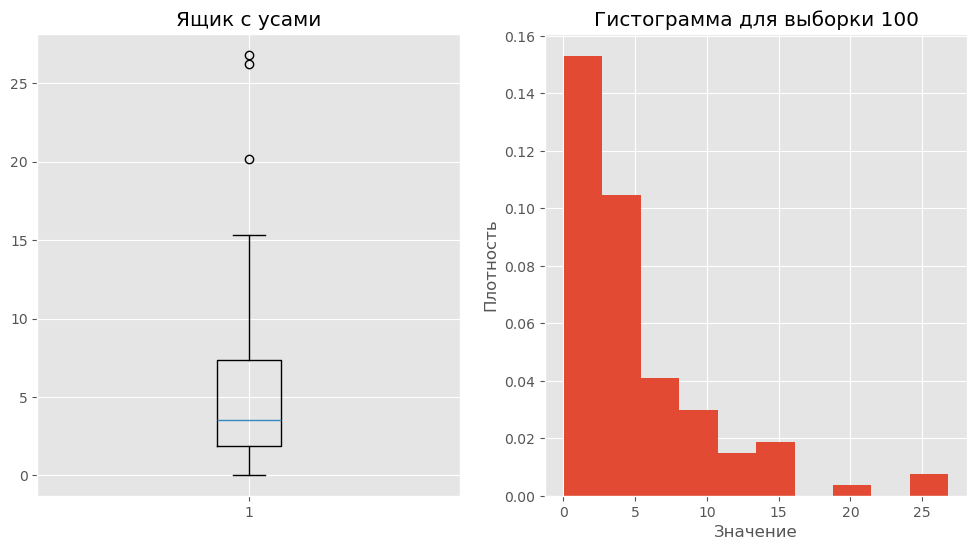

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(selection_1)
plt.title('Ящик с усами')
#края усов - это квантили 25 и 75 -/+ полтора интерквантильных размаха
# края коробки - квантиль 25 и 75, и та, что посередине - медиана

plt.subplot(1, 2, 2)
plt.hist(selection_1, bins=int(np.sqrt(len(selection_1))), density= True)
plt.title('Гистограмма для выборки 100')
plt.xlabel('Значение')
plt.ylabel('Плотность')

* **(5 баллов)** Попробуйте удалить из выборки элементы, которые лежат за пределами "усов" (формула границ усов была на лекции). Сравните средние и медианы выборок до удаления и после. Изменилось ли что-то? Стоило ли удалять эти элементы?

In [ ]:
d_limit = np.percentile(selection_1, 25) - 1.5*(np.percentile(selection_1, 75) - np.percentile(selection_1, 25))
up_limit = np.percentile(selection_1, 75) + 1.5*(np.percentile(selection_1, 75) - np.percentile(selection_1, 25))
new_selection = selection_1[(selection_1 >= d_limit) & (selection_1 <= up_limit)]
print(f'Среднее - было {selection_1.mean()} - стало {new_selection.mean()}')
print(f'Медиана - было {np.median(selection_1)} - стало {np.median(new_selection)}')
#Да, стоило удалить выбросы, так как они влияли на среднее

Среднее - было 5.089924550777492 - стало 4.492741749302193
Медиана - было 3.5294056634768904 - стало 3.3457838276205507


#### 2. Интерпретация. (10 баллов)

Возьмите выборку размера 1000 из прошлого пункта. Считайте эту выборку выборкой сроков службы лампочек (в годах) Большой электронно-счётной машины (БЭСМ-1) (разработанной в 1953 году в СССР и использующей лампы вместо транзисторов и реле https://www.computer-museum.ru/histussr/29-3.htm) (как мы знаем, экспоненциальное распределение хорошо моделирует срок службы чего-то).

Что вы можете сказать на основе приведённых данных? (например: какой средний срок службы?; на сколько большой разброс в сроке службы наблюдается в данных?; если машине требуется капитальный ремонт, когда перегорает 15% лампочек, как скоро его понадобилось провести?; насколько дольше горела самая долгоживущая лампочка по сравнению с основной массой (95%)?...)

Обязательно сопровождайте свои выводы вычислением описательных статистик и/или построением графиков.

In [ ]:
print(f'Cредний срок службы: {np.median(selection_2)}')
print(f'Pазброс в сроке службы: {selection_2.std()}')
print(f'Eсли машине требуется капитальный ремонт, когда перегорает 15% лампочек -то через {np.percentile(selection_2, 15)} года нужен будет ремонт')
print(f'Cамая долгоживущая лампочка горела на {np.max(selection_2) - np.mean(selection_2[selection_2 <= np.percentile(selection_2, 95)])} лет больше чем основная часть лампочек')

Cредний срок службы: 3.5301098282608807
Pазброс в сроке службы: 4.891308221124779
Eсли машине требуется капитальный ремонт, когда перегорает 15% лампочек -то через 0.8068638285092842 года нужен будет ремонт
Cамая долгоживущая лампочка горела на 27.298591836876554 лет больше чем основная часть лампочек
